# Overview

The goal of this tutorial is to demonstrate the key components of a end-to-end data science/machine learning project. Note that the focus is to show the overall workflow not to build the best performing model.

The following shows the key steps:

- Load and split train/test data
- Exploratory Data Analysis (EDA)
- Data pre-processing and pipeline
- Model building, evaluation, tuning, and selection
- Feature importance analysis and feature selection
- Model persistence
- Web app development and deployment


In [225]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')  # change the default style

In [226]:
# read csv data into pandas dataframe
df = pd.read_csv('titanic.csv')

In [227]:
# basic shape, data type, null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [228]:
# first 5 lines of data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [229]:
# Prepare the data by separating X and y
# dropping unimportant features, such as passenger id, name, ticket number and cabin number
# note that interesting features might be engieered from the dropped features above

# axis = 1 below means dropping by columns, 0 means by rows
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [230]:
# Split the data into a training set and a test set. 
# Any number for the random_state is fine, see 42: https://en.wikipedia.org/wiki/42_(number) 
# We choose to use 20% (test_size=0.2) of the data set as the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(712, 7)
(179, 7)


# Basic EDA
You can show basic descriptive statistics using pandas easily. 

In [231]:
# basic stats
X_train.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712,572.000000,712.000000,712.000000,712.000000,710
unique,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,467,NaN,NaN,NaN,NaN,525
mean,2.330056,NaN,29.498846,0.553371,0.379213,32.586276,NaN
std,0.824584,NaN,14.500059,1.176404,0.791669,51.969529,NaN
min,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,2.000000,NaN,21.000000,0.000000,0.000000,7.925000,NaN
50%,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,3.000000,NaN,38.000000,1.000000,0.000000,30.500000,NaN


### Visual inspection is important
Simple descriptive statistics may not be enough and visual inspection of data is very important, i.e., check out Anscombe's quartet: https://en.wikipedia.org/wiki/Anscombe%27s_quartet

In [232]:
anscombe = pd.read_csv("anscombe.csv")
anscombe_grouped = anscombe.groupby('dataset')

# `key` contains the name of the grouped element 
# `group_df` is a normal dataframe containing only the data referring to the key
for key, group_df in anscombe.groupby('dataset'):
    print(group_df.describe()) 

               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000000   8.190000
max    19.000000  12

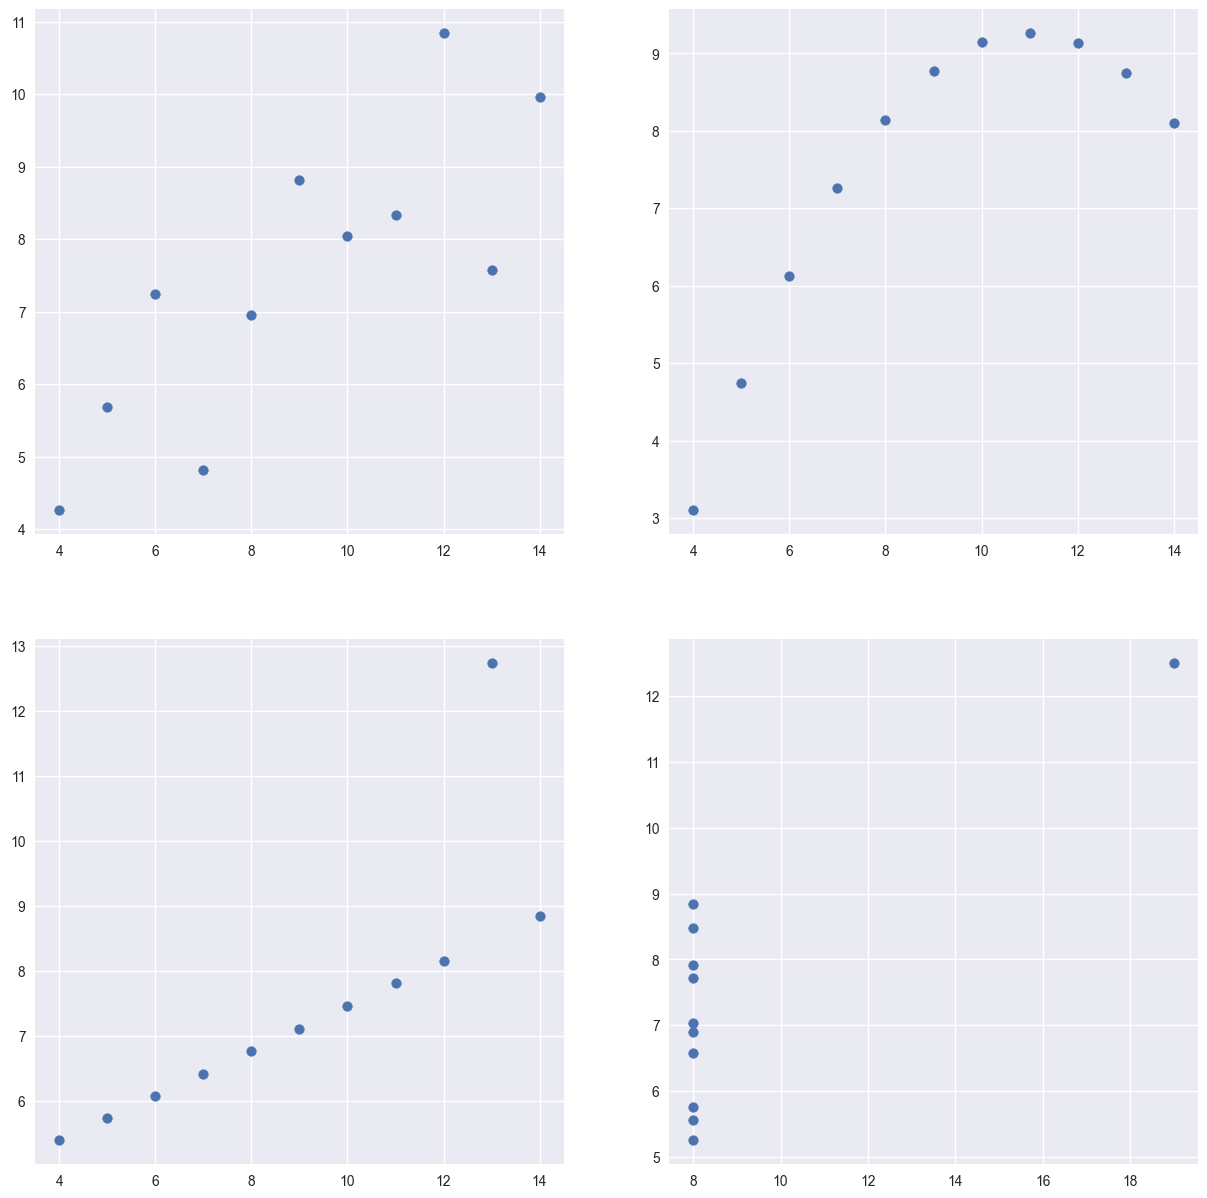

In [233]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0,0].scatter(anscombe[anscombe['dataset']=='I']['x'], anscombe[anscombe['dataset']=='I']['y'])
ax[0,1].scatter(anscombe[anscombe['dataset']=='II']['x'], anscombe[anscombe['dataset']=='II']['y'])
ax[1,0].scatter(anscombe[anscombe['dataset']=='III']['x'], anscombe[anscombe['dataset']=='III']['y'])
ax[1,1].scatter(anscombe[anscombe['dataset']=='IV']['x'], anscombe[anscombe['dataset']=='IV']['y'])

## Histogram
Use the histogram to check the followings:

- The distributions of the data 
- center and spread of the data
- skewness of the data
- presence of outliers

array([[<AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>]],
      dtype=object)

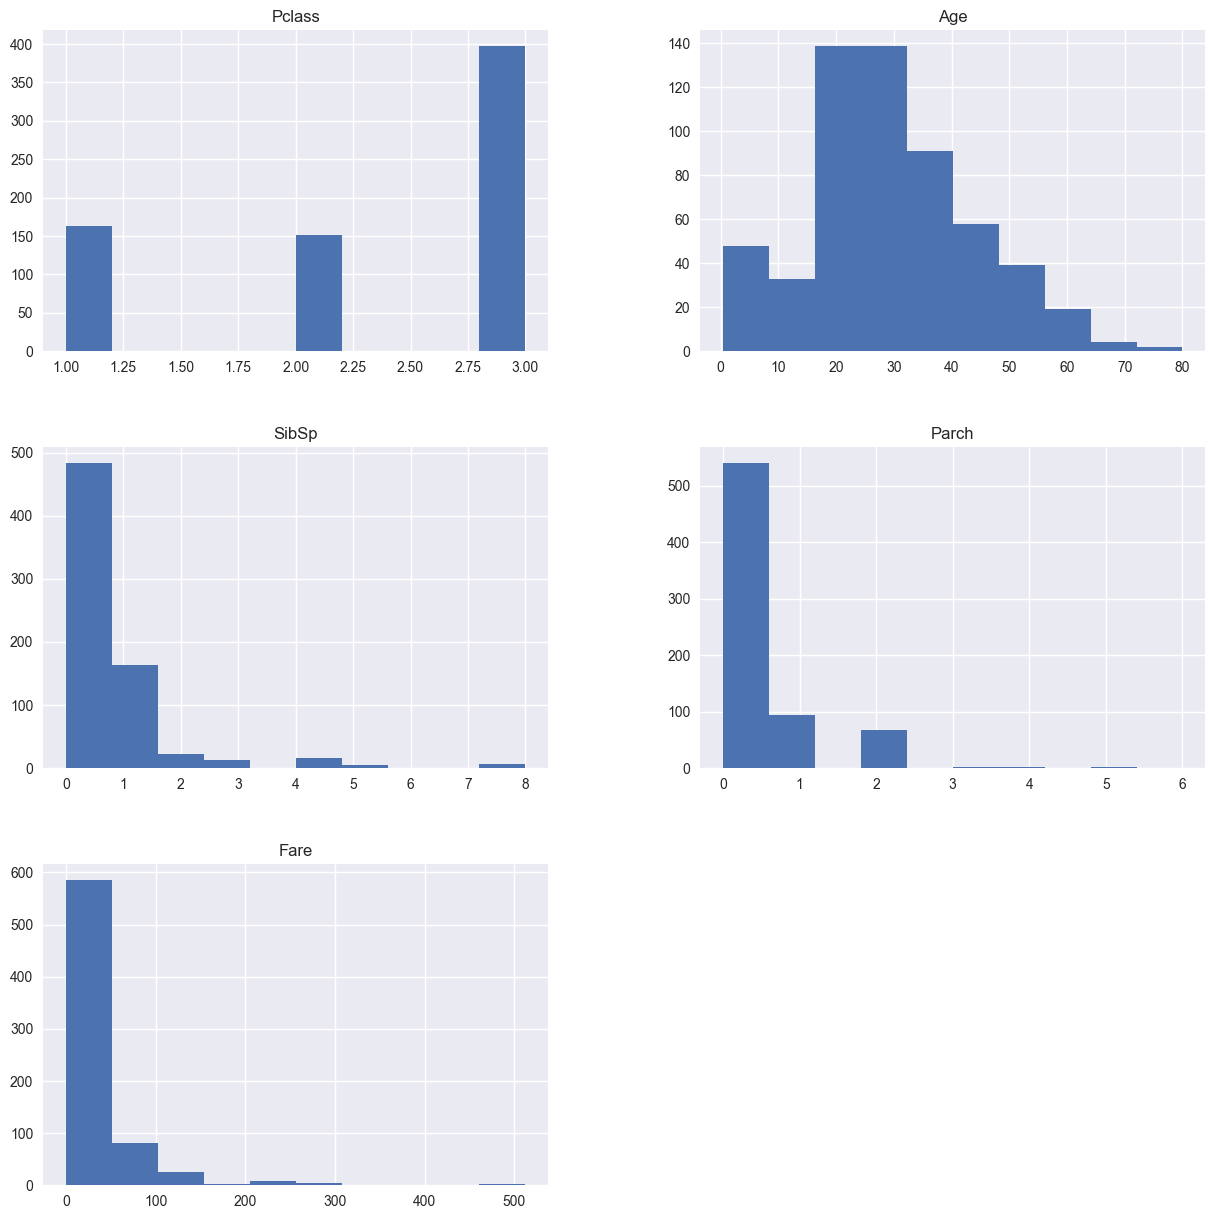

In [234]:
# histograms for all numerical features
X_train.hist(figsize=(15,15))

<AxesSubplot:>

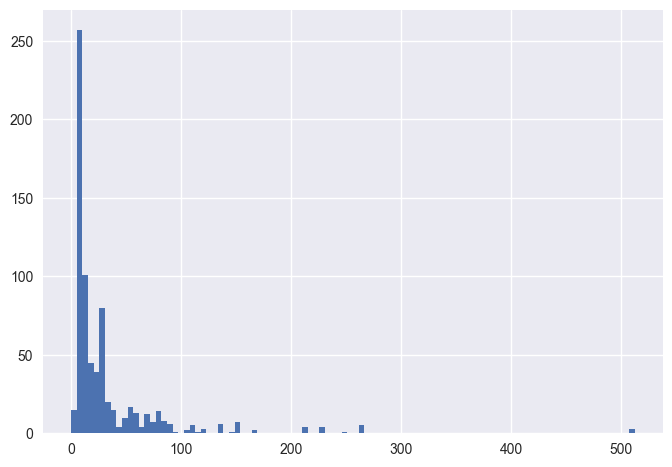

In [235]:
# key findings with potential processing
# long tail (skewed left): log transformation
# some outliers: outlier removal
X_train['Fare'].hist(bins=100)

## Box Plot

A boxplot displays the dataset based on a five-number summary:

- Median (Q2 / 50th Percentile) : the middle value of the dataset.

- First quartile (Q1 / 25th Percentile) : the middle value between the smallest number and the median of the dataset.

- Third quartile (Q3 / 75th Percentile) : the middle value between the largest number and the median of the dataset.

Interquartile Range (IQR) is the distance between the upper and lower quartile: IQR=Q3-Q1, 
IQR is used to determine outliers, which are points that are more than 1.5IQR from the median

- Minimum (NOT the smallest): the lowest data point excluding any outliers.

- Maximum (NOT the largest): the largest data point excluding any outliers.




### A box plot identifies the middle 50% of the data (the box), the median (the line in the box), and the outliers (the dots outside the max and min)

<AxesSubplot:>

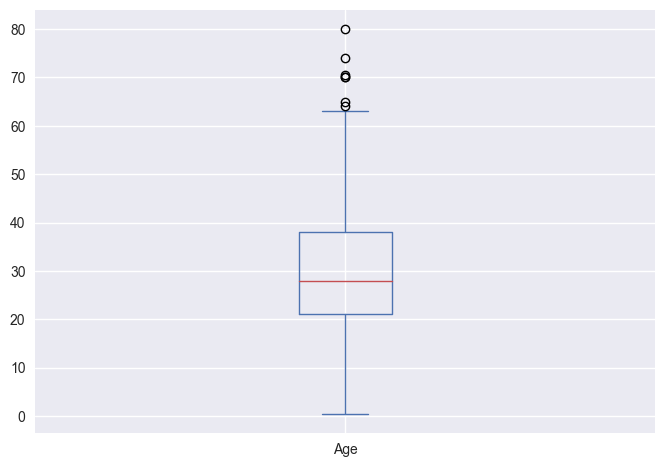

In [236]:
X_train['Age'].plot.box()

## Scatter Plot

Scatter plot is often used for **correlation analysis** between different features. Correlation coefficient is between -1 and 1, representing negative and positive correlations. 0 means there is no liner correlation. Correlation is said to be linear if the ratio of change is constant, otherwise is non-linear. 

Text(0, 0.5, 'Fare')

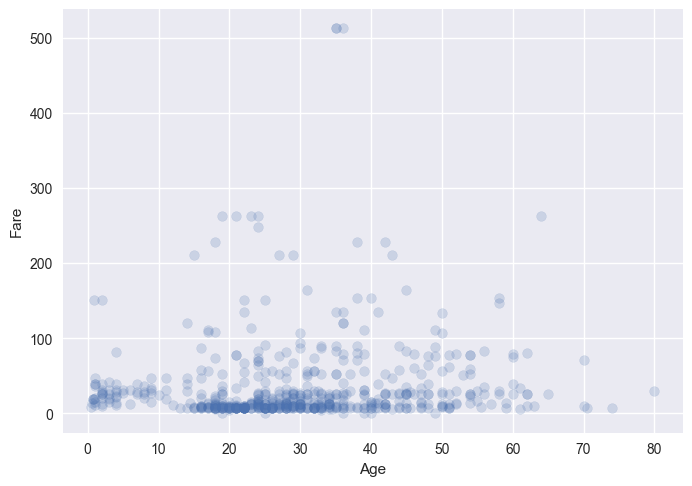

In [237]:
fig, ax = plt.subplots()
ax.scatter(x=X_train['Age'], y=X_train['Fare'], alpha=0.2) # alpha=0.2 specifies the opacity
ax.set_xlabel('Age')
ax.set_ylabel('Fare')

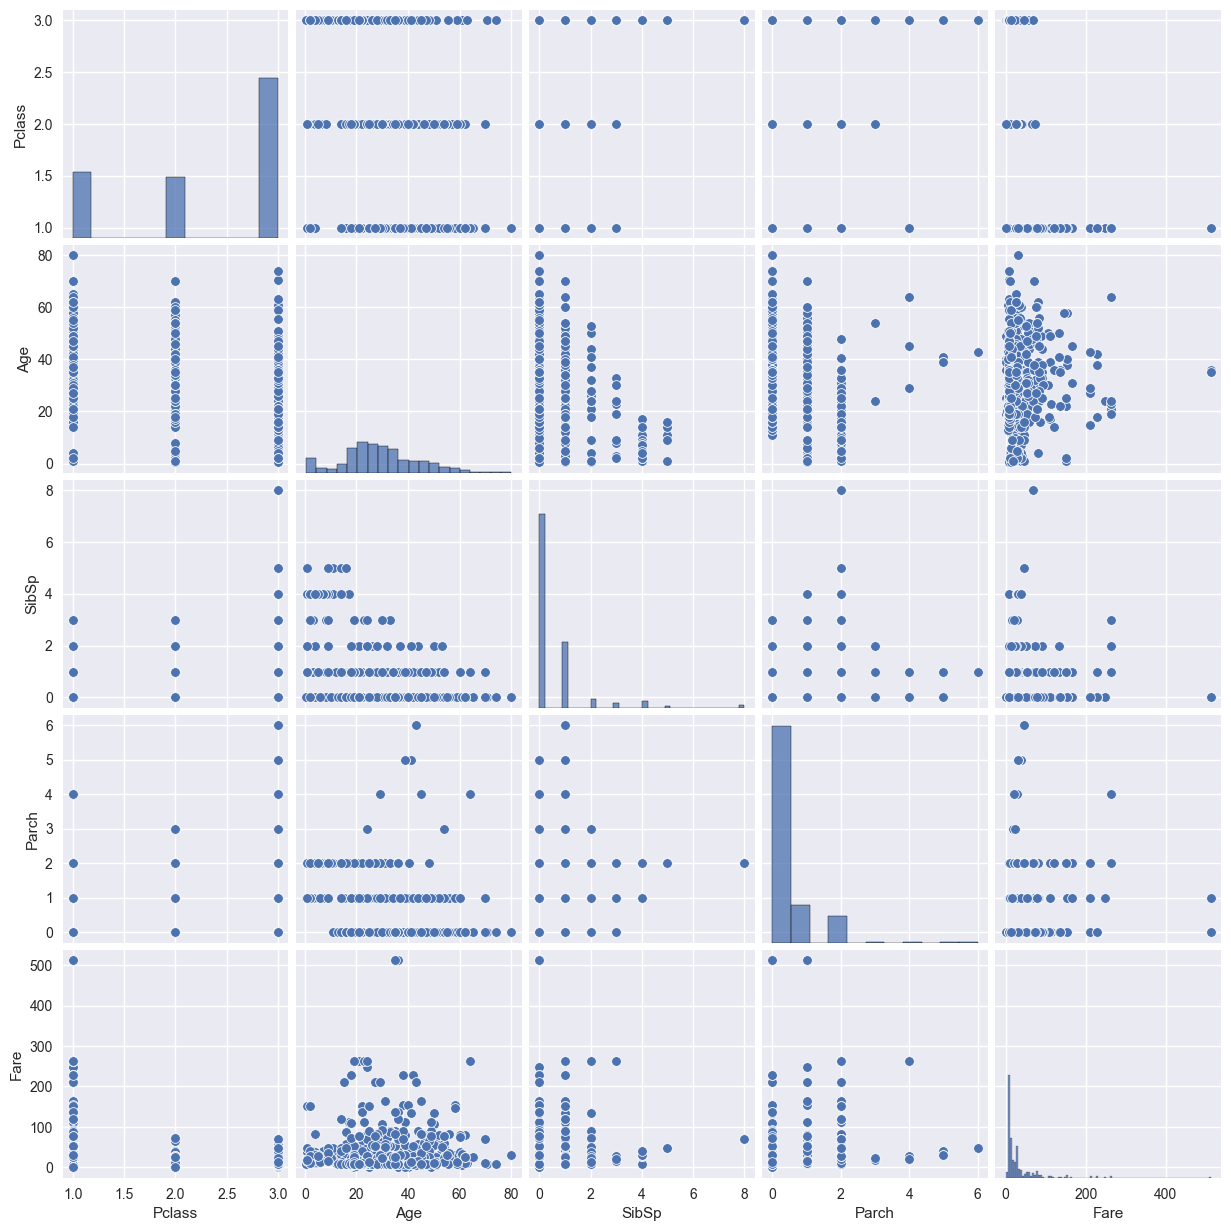

In [238]:
# pairplot example using seaborn
sns.pairplot(data=X_train)

## Data pre-processing
We will build a pipeline to do some of the following tasks:

- Missing data
- Feature scaling (important for certain model such as Gradient Descent based models)
- Categorical feature encoding
- Outlier removal
- Transformation
- Custom processing

In [239]:
# any missing values?
X_train.isnull().sum()

Pclass        0
Sex           0
Age         140
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [240]:
# We will train our decision tree classifier with the following features:
# Numerical Features: ['Age', 'SibSp', 'Fare', 'Parch']
# Categorical Features:['Sex', 'Embarked', 'Pclass'

num_features = ['Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Sex', 'Embarked', 'Pclass']

In [241]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipeline for numerical features
# There are two steps in this pipeline
# Pipeline(steps=[(name1, transform1), (name2, transform2), ...]) 
# NOTE the step names can be arbitrary

# Step 1 is what we discussed before - filling the missing values if any using mean
# Step 2 is feature scaling via standardization - making features look like normal-distributed 
# see sandardization: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
num_pipeline = Pipeline(
    steps=[
        ('num_imputer', SimpleImputer()),  # we will tune differet strategies later
        ('scaler', StandardScaler()),
        ]
)

# Create the preprocessing pipelines for the categorical features
# There are two steps in this pipeline:
# Step 1: filling the missing values if any using the most frequent value
# Step 2: one hot encoding

cat_pipeline = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder()),
    ]
)

# Assign features to the pipelines and Combine two pipelines to form the preprocessor
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

## Baseline prediction

It's always helpful to have some baseline predictions based on heuristics/rules so that you can benchmark your model performance. The following shows that female has much higher survival rate than male so that we can have a rule-based baseline to predict all female survivied and male died. For regression problem, an easy baseline could be using the training sample mean for all predictions.

In [242]:
# calculate the survival rates by gender
# female survival rate: 74.2%
# male survival rate: 18.9%
group_norm = df.groupby('Sex')['Survived'].value_counts(normalize=True)
group_norm

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

In [243]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,male,NaN,1,1,15.2458,C
439,2,male,31.0,0,0,10.5000,S
840,3,male,20.0,0,0,7.9250,S
720,2,female,6.0,0,1,33.0000,S
39,3,female,14.0,1,0,11.2417,C


In [244]:
# rule-based prediction
baseline_pred = X_test['Sex'].apply(lambda x: 0 if x == 'male' else 1)

In [245]:
from sklearn.metrics import accuracy_score
print(f'Baseline Accuracy Score : {accuracy_score(y_test, baseline_pred)}')

Baseline Accuracy Score : 0.7821229050279329


## Model traning, tuning, evaluation and selection

Next, I attach three different models (Decision Tree, SVC, Random Forest) to the same pre-processing pipeline and tune the some parameters using GridSearch with cross validation. Then, we compare their performance and choose the best model to proceed. 

In [246]:
# Specify the model to use, which is DecisionTreeClassifier
# Make a full pipeline by combining preprocessor and the model
from sklearn.tree import DecisionTreeClassifier

pipeline_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clf_dt', DecisionTreeClassifier()),
    ]
)

In [247]:
# we show how to use GridSearch with K-fold cross validation (K=10) to fine tune the model
# we use the accuracy as the scoring metric with training score return_train_score=True
from sklearn.model_selection import GridSearchCV

# set up the values of hyperparameters you want to evaluate
# here you must use the step names as the prefix followed by two under_scores to sepecify the parameter names and the "full path" of the steps

# we are trying 2 different impputer strategies 
# 2x5 different decision tree models with different parameters
# in total we are trying 2x2x5 = 20 different combinations

param_grid_dt = [
    {
        'preprocessor__num_pipeline__num_imputer__strategy': ['mean', 'median'],
        'clf_dt__criterion': ['gini', 'entropy'], 
        'clf_dt__max_depth': [3, 4, 5, 6, 7],
    }
]

# set up the grid search 
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=10, scoring='accuracy')

In [248]:
# train the model using the full pipeline
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('cat_pi

In [249]:
# check the best performing parameter combination
grid_search_dt.best_params_

{'clf_dt__criterion': 'entropy',
 'clf_dt__max_depth': 3,
 'preprocessor__num_pipeline__num_imputer__strategy': 'mean'}

In [250]:
# build-in CV results keys
sorted(grid_search_dt.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_clf_dt__criterion',
 'param_clf_dt__max_depth',
 'param_preprocessor__num_pipeline__num_imputer__strategy',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'split8_test_score',
 'split9_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [251]:
# test score for the 20 decision tree models
grid_search_dt.cv_results_['mean_test_score']

array([0.82443271, 0.82443271, 0.81318466, 0.81318466, 0.81457355,
       0.8131651 , 0.80612285, 0.80330595, 0.80056729, 0.79776995,
       0.82584116, 0.82584116, 0.82304382, 0.82304382, 0.80477308,
       0.8062011 , 0.809018  , 0.80897887, 0.79348592, 0.79489437])

In [252]:
# best decistion tree model test score
grid_search_dt.best_score_

0.8258411580594679

In [253]:
# try SVM classifer
from sklearn.svm import SVC

# SVC pipeline
pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('clf_svc', SVC(probability=True)),  # we need the probability scores later
])

# here we are trying three different kernel and three degree values for polynomail kernel
# in total 5 different combinations
param_grid_svc = [
    {
        'clf_svc__kernel': ['linear', 'poly', 'rbf'], 
        'clf_svc__degree': [3, 4, 5],  # only for poly kernel
    }
]

# set up the grid search 
grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=10, scoring='accuracy')

In [254]:
# train the model using the full pipeline
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('cat_pi

In [255]:
# best test score
grid_search_svc.best_score_

0.8230829420970267

In [256]:
# try random forest classifer
from sklearn.ensemble import RandomForestClassifier

# rf pipeline
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('clf_rf', RandomForestClassifier()),
])

# here we are trying 2x3 different rf models
param_grid_rf = [
    {
        'clf_rf__criterion': ['gini', 'entropy'], 
        'clf_rf__n_estimators': [50, 100, 150],  
    }
]

# set up the grid search 
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=10, scoring='accuracy')

In [257]:
%%time
# train the model using the full pipeline
grid_search_rf.fit(X_train, y_train)

CPU times: user 10.7 s, sys: 91 ms, total: 10.8 s
Wall time: 11.2 s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('cat_pi

In [258]:
# best test score
print('best dt score is: ', grid_search_dt.best_score_)
print('best svc score is: ', grid_search_svc.best_score_)
print('best rf score is: ', grid_search_rf.best_score_)

best dt score is:  0.8258411580594679
best svc score is:  0.8230829420970267
best rf score is:  0.800625978090767


In [259]:
# select the best model
# the best parameters are shown, note SimpleImputer() implies that mean strategry is used
clf_best = grid_search_dt.best_estimator_
clf_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
           

In [260]:
# final test on the testing set
# To predict on new data: simply calling the predict method 
# the full pipeline steps will be applied to the testing set followed by the prediction
y_pred = clf_best.predict(X_test)

# calculate accuracy, Note: y_test is the ground truth for the tesing set
# we have similiar score for the testing set as the cross validation score - good

print(f'Accuracy Score : {accuracy_score(y_test, y_pred)}')

Accuracy Score : 0.7988826815642458


Confusion Matrix: 
 [[51 23]
 [13 92]]


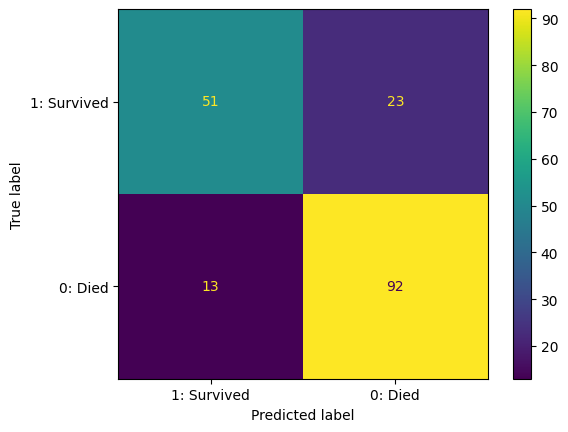

In [261]:
# plot the confusion matrix with default label order (ascending order, 0, 1, etc.)
# NOTE, the True Positive is in the bottom right quadrant
plt.style.use('default') # use default styple for confusion matrix plots

from sklearn.metrics import plot_confusion_matrix

#matrix = plot_confusion_matrix(clf_best, X_test, y_test) # the default confusion matrix

# plot the confusion matrix with preferred label order and label name
# true positive in the left upper quadrant
class_names = ['1: Survived', '0: Died']
matrix = plot_confusion_matrix(clf_best, X_test, y_test, labels=[1, 0], display_labels=class_names)

# disp.confusion_matrix returns confusion matrix as an array
print(f'Confusion Matrix: \n {matrix.confusion_matrix}' )

In [262]:
# our model is better than the base line - good
print(f'Baseline Accuracy Score : {accuracy_score(y_test, baseline_pred)}')
print(f'Our Best Accuracy Score : {accuracy_score(y_test, y_pred)}')

Baseline Accuracy Score : 0.7821229050279329
Our Best Accuracy Score : 0.7988826815642458


## Precision-Recall Trade-off and ROC/AUC
I chose the best model based on accuracy score above. In classification, the final prediction for a data point actually has probability scores. For example, for one person in this Titanic dataset, a prediction looks like `[0.35, 0.65]`, which means the predicted probability for this person to be 0 (died) is 0.35 and the predicted probability to be 1 (survived) is 0.65. The default decision threshold is 0.5 for decision tree classifier, therefore this person is predicted to be 1 (survived). However, if we change the threshold to be 0.7, then the same person would be predicted to be 0 (died). 

Changing the decision threshold often leads to changes in precision and recall. Increasing precision often decreases recall and vice versa, which is called precision-recall trade-off. Given a specific context, you may favor precision over recall or the other way around. 

Receiver Operating Characteristic (ROC) is another metric to evaluate classifier output quality using Recall (True Positive Rate) and FPR (False Positive Rate). For classification problems with very imbalanced data (such as the current COVID-19 testing data, way more people are negative), the default threshold can result in poor model performance. **ROC/AUC is often a better metric than accuracy for imbalancd data.**

Next, I show the AUC scores for the three different models and plot the ROC curves.

In [263]:
# get the probability score the decision tree model
# for each prediction, we have two probabilities for two labels 0 means died, 1 means survived
y_pred_proba_dt = grid_search_dt.best_estimator_.predict_proba(X_test)
print(y_pred_proba_dt[0])  # 0.881 died, 0.118 survivied
y_scores_dt = y_pred_proba_dt[:, 1]  # this is the score of positive class

[0.88135593 0.11864407]


In [264]:
# get the probability scores for svc and random forest
y_pred_proba_svc = grid_search_svc.best_estimator_.predict_proba(X_test)
y_scores_svc = y_pred_proba_svc[:, 1]  # this is the score of positive class

y_pred_proba_rf = grid_search_rf.best_estimator_.predict_proba(X_test)
y_scores_rf = y_pred_proba_rf[:, 1]  # this is the score of positive class

AUC score for dt is 0.8463320463320464
AUC score for svc is 0.8648648648648648
AUC score for rf is 0.8874517374517373


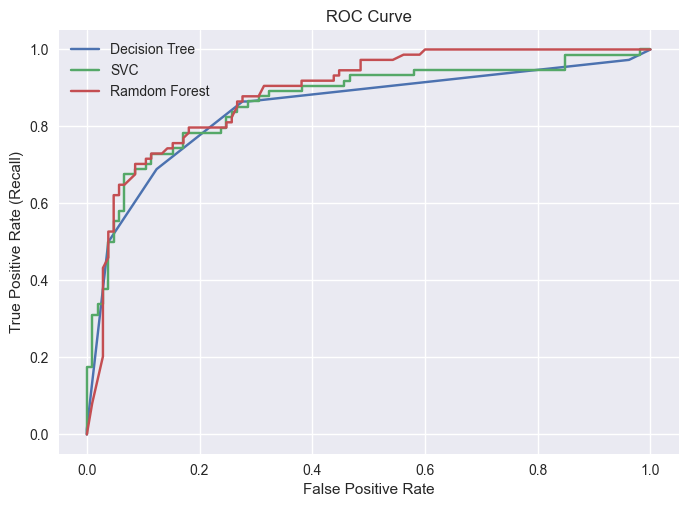

In [290]:
# fpt: false positive rate, tpr: true positive rate (recall)
# random forest is the best model according to AUC score and its ROC curve is closer to the top-left corner
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_scores_dt)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_scores_svc)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_scores_rf)

print(f'AUC score for dt is {roc_auc_score(y_test, y_scores_dt)}')
print(f'AUC score for svc is {roc_auc_score(y_test, y_scores_svc)}')
print(f'AUC score for rf is {roc_auc_score(y_test, y_scores_rf)}')

# plot the ROC Curve
plt.style.use('seaborn')
fig, ax = plt.subplots()

ax.plot(fpr_dt, tpr_dt, label="Decision Tree")
ax.plot(fpr_svc, tpr_svc, label="SVC")
ax.plot(fpr_rf, tpr_rf, label="Ramdom Forest")
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate (Recall)')
ax.legend()

## Feature Importance

Given that we are using pipeline and one-hot encoding, the feature importance scores are not very straightforward to get. The following code shows how to get the feature importance scores from the decision tree model and create a plot.

In [266]:
clf_best.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num_pipeline',
                                  Pipeline(steps=[('num_imputer',
                                                   SimpleImputer()),
                                                  ('scaler', StandardScaler())]),
                                  ['Age', 'SibSp', 'Parch', 'Fare']),
                                 ('cat_pipeline',
                                  Pipeline(steps=[('cat_imputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehot', OneHotEncoder())]),
                                  ['Sex', 'Embarked', 'Pclass'])]),
 'clf_dt': DecisionTreeClassifier(criterion='entropy', max_depth=3)}

In [267]:
clf_best.named_steps['preprocessor']

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['Sex', 'Embarked', 'Pclass'])])

In [268]:
i = clf_best['clf_dt'].feature_importances_
i

array([0.08110601, 0.05513595, 0.        , 0.0608736 , 0.        ,
       0.54533576, 0.        , 0.        , 0.        , 0.05311821,
       0.        , 0.20443047])

In [269]:
clf_best['preprocessor'].transformers_

[('num_pipeline',
  Pipeline(steps=[('num_imputer', SimpleImputer()), ('scaler', StandardScaler())]),
  ['Age', 'SibSp', 'Parch', 'Fare']),
 ('cat_pipeline',
  Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                  ('onehot', OneHotEncoder())]),
  ['Sex', 'Embarked', 'Pclass'])]

In [270]:
# get columnTransformer
clf_best[0] 

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['Sex', 'Embarked', 'Pclass'])])

In [271]:
clf_best[0].transformers_

[('num_pipeline',
  Pipeline(steps=[('num_imputer', SimpleImputer()), ('scaler', StandardScaler())]),
  ['Age', 'SibSp', 'Parch', 'Fare']),
 ('cat_pipeline',
  Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                  ('onehot', OneHotEncoder())]),
  ['Sex', 'Embarked', 'Pclass'])]

In [272]:
num_original_feature_names = clf_best[0].transformers_[0][2]
num_original_feature_names

['Age', 'SibSp', 'Parch', 'Fare']

In [273]:
cat_original_feature_names = clf_best[0].transformers_[1][2]
cat_original_feature_names

['Sex', 'Embarked', 'Pclass']

In [274]:
cat_new_feature_names = list(clf_best[0].transformers_[1][1]['onehot'].get_feature_names(cat_original_feature_names))
cat_new_feature_names

['Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3']

In [275]:
feature_names = num_original_feature_names + cat_new_feature_names
feature_names

['Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3']

In [276]:
r = pd.DataFrame(i, index=feature_names, columns=['importance'])
r

,importance
Age,0.081106
SibSp,0.055136
Parch,0.000000
Fare,0.060874
Sex_female,0.000000
Sex_male,0.545336
Embarked_C,0.000000
Embarked_Q,0.000000
Embarked_S,0.000000
Pclass_1,0.053118


In [277]:
r.sort_values('importance', ascending=False)

,importance
Sex_male,0.545336
Pclass_3,0.204430
Age,0.081106
Fare,0.060874
SibSp,0.055136
Pclass_1,0.053118
Parch,0.000000
Sex_female,0.000000
Embarked_C,0.000000
Embarked_Q,0.000000


<AxesSubplot:>

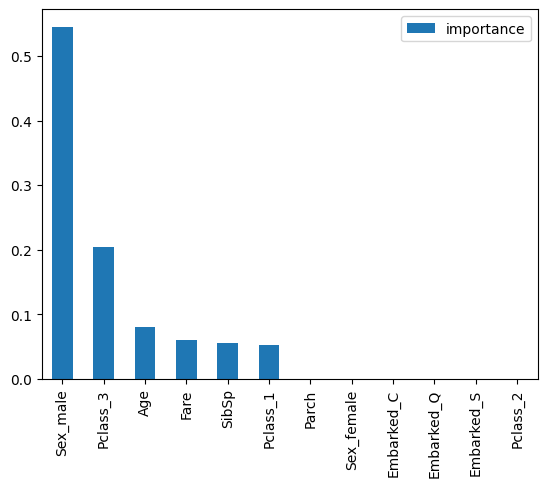

In [278]:
r.sort_values('importance', ascending=False).plot.bar()

In [279]:
# we remove the most important feature Sex and see how the model is affected
# result: accuracy drops from ~0.826 to ~0.716
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Embarked', 'Pclass']

# you must update preprocess and pipeline after changing the feature list
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

pipeline_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clf_dt', DecisionTreeClassifier()),
    ]
)

# update the grid search 
grid_search_dt_updated = GridSearchCV(pipeline_dt, param_grid_dt, cv=10, scoring='accuracy')

# train the model using the updated full pipeline
grid_search_dt_updated.fit(X_train, y_train)  # # note here X_train is still having 7 features only 6 is used

print('best dt score is: ', grid_search_dt.best_score_)
print('best dt score after feature selection is: ', grid_search_dt_updated.best_score_)

best dt score is:  0.8258411580594679
best dt score after feature selection is:  0.7150234741784037


In [280]:
# we remove unimportant features: Parch and Embarked and see the model is affected
# result: no difference with less features!!
num_features = ['Age', 'SibSp', 'Fare']
cat_features = ['Sex', 'Pclass']

# you must update preprocess and pipeline after changing the feature list
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

pipeline_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clf_dt', DecisionTreeClassifier()),
    ]
)

# update the grid search 
grid_search_dt_updated = GridSearchCV(pipeline_dt, param_grid_dt, cv=10, scoring='accuracy')

# train the model using the updated full pipeline
grid_search_dt_updated.fit(X_train, y_train) # note here X_train is still having 7 features only 5 is used

print('best dt score is: ', grid_search_dt.best_score_)
print('best dt score after feature selection is: ', grid_search_dt_updated.best_score_)

best dt score is:  0.8258411580594679
best dt score after feature selection is:  0.8258411580594679


In [281]:
# we need to split the data to make X_train expect 5 features instead of 7

# drop 'Parch', 'Embarked'
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Parch', 'Embarked'], axis=1)
y = df['Survived']

# re-split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# updated feature lists
num_features = ['Age', 'SibSp', 'Fare']
cat_features = ['Sex', 'Pclass']

# updated preprocess and pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

pipeline_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clf_dt', DecisionTreeClassifier()),
    ]
)

# updated the grid search 
grid_search_dt_updated = GridSearchCV(pipeline_dt, param_grid_dt, cv=10, scoring='accuracy')

# train the model using the updated full pipeline
grid_search_dt_updated.fit(X_train, y_train) # note here X_train is still having 7 features only 5 is used

print('best dt score is: ', grid_search_dt.best_score_)
print('best dt score after feature selection is: ', grid_search_dt_updated.best_score_)

best dt score is:  0.8258411580594679
best dt score after feature selection is:  0.8258411580594679


In [282]:
# reassign the best model to have only 5 features
clf_best = grid_search_dt_updated.best_estimator_

## Persist the Model
The following code shows how to save the trained model as a pickle file, which can be loaded in to make predictions.

In [283]:
# Save the model as a pickle file
import joblib
joblib.dump(clf_best, "clf-best.pickle")

['clf-best.pickle']

In [284]:
# Load the model from a pickle file
saved_tree_clf = joblib.load("clf-best.pickle")
saved_tree_clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Fare']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Pclass'])]))

In [285]:
passenger1 = pd.DataFrame(
    {
        'Pclass': [3],
        'Sex': ['male'], 
        'Age': [23],
        'SibSp': [0],
        'Fare': [5.5],
    }
)
passenger1

,Pclass,Sex,Age,SibSp,Fare
0,3,male,23,0,5.5


In [286]:
passenger2 = pd.DataFrame(
    {
        'Pclass': [1],
        'Sex': ['female'], 
        'Age': [21],
        'SibSp': [0],
        'Fare': [80],
    }
)
passenger2

,Pclass,Sex,Age,SibSp,Fare
0,1,female,21,0,80


In [287]:
# died
pred1 = saved_tree_clf.predict(passenger1)
pred1

array([0])

In [288]:
# survived
pred2 = saved_tree_clf.predict(passenger2)
pred2

array([1])